In [89]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

gdp = pd.read_csv("C:/Users/manvi/OneDrive/Documents/Information Visualisation/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv")
lifeexpectancy = pd.read_csv("C:/Users/manvi/OneDrive/Documents/Information Visualisation/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--life_expectancy_years--by--geo--time.csv")
gdp_lifeexp = pd.merge(gdp,lifeexpectancy, how='inner',left_on=['geo','time'], right_on=['geo','time'])

gdp_lifeexp=gdp_lifeexp.groupby(['time']).agg({'time':np.mean,'income_per_person_gdppercapita_ppp_inflation_adjusted': np.mean, 
                                      'life_expectancy_years': np.mean})

data1: mean=4590.118 stdv=4947.494
data2: mean=43.051 stdv=14.411


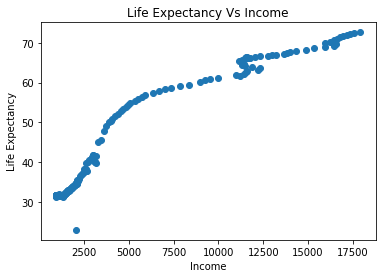

In [90]:
# generate related variables
# prepare data
data1 = gdp_lifeexp['income_per_person_gdppercapita_ppp_inflation_adjusted']
data2 = gdp_lifeexp['life_expectancy_years']
# summarize
print('data1: mean=%.3f stdv=%.3f' % (np.mean(data1), np.std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (np.mean(data2), np.std(data2)))
# plot
plot.scatter(data1, data2)
plot.title('Life Expectancy Vs Income')
plot.xlabel('Income')
plot.ylabel('Life Expectancy')
plot.show()

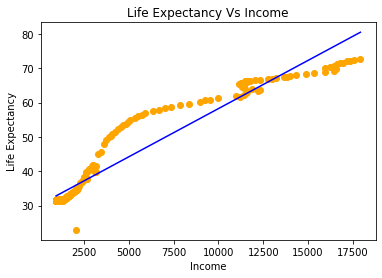

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     2770.
Date:                Sat, 26 Oct 2019   Prob (F-statistic):          1.55e-125
Time:                        13:37:27   Log-Likelihood:                -607.90
No. Observations:                 219   AIC:                             1220.
Df Residuals:                     217   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.1760      0.360     83.900      0.000      29.467      30.885
x              0.0028   5.33e-05     52.633      0.000       0.003       0.003
==============================================================================
Omnibus:                       37.857   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.128
Skew:                           0.990   Prob(JB):                     3.93e-13
Kurtosis:                       4.530   Cond. No.                     9.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
linearRegressor = LinearRegression()
x = gdp_lifeexp.iloc[:, 1].values.reshape(-1, 1)
y = gdp_lifeexp.iloc[:, 2].values
linearRegressor.fit(x, y)
yPrediction=linearRegressor.predict(x)

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('y~x',data=gdp_lifeexp).fit()

# Visualising the training set results
plot.scatter(x, y, color = 'orange')
plot.plot(x, yPrediction, color = 'blue')
plot.title('Life Expectancy Vs Income')
plot.xlabel('Income')
plot.ylabel('Life Expectancy')
plot.show()

# Inspect the results
results.summary()

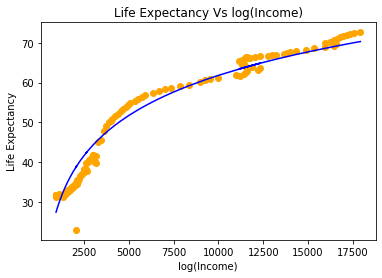

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     4988.
Date:                Sat, 26 Oct 2019   Prob (F-statistic):          1.05e-151
Time:                        13:37:27   Log-Likelihood:                -547.11
No. Observations:                 219   AIC:                             1098.
Df Residuals:                     217   BIC:                             1105.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -72.5382      1.649    -43.993      0.000     -75.788     -69.288
x1            14.5881      0.207     70.623      0.000      14.181      14.995
==============================================================================
Omnibus:                       33.782   Durbin-Watson:                   0.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.111
Skew:                          -0.810   Prob(JB):                     8.85e-14
Kurtosis:                       4.991   Cond. No.                         66.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
linearRegressor = LinearRegression()
x = gdp_lifeexp.iloc[:, 1].values.reshape(-1, 1)
y = gdp_lifeexp.iloc[:, 2].values
x1 = np.log(x)


linearRegressor.fit(x1, y)
yPrediction=linearRegressor.predict(x1)

# Visualising the training set results
plot.scatter(x, y, color = 'orange')
plot.plot(x, yPrediction, color = 'blue')
plot.title('Life Expectancy Vs log(Income)')
plot.xlabel('log(Income)')
plot.ylabel('Life Expectancy')
plot.show()

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('y ~ x1',data=gdp_lifeexp).fit()

# Inspect the results
results.summary()

In [93]:
gdp = pd.read_csv("C:/Users/manvi/OneDrive/Documents/Information Visualisation/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv")
child_deaths = pd.read_csv("C:/Users/manvi/OneDrive/Documents/Information Visualisation/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--number_of_child_deaths--by--geo--time.csv")

gdp_childdeaths = pd.merge(gdp,child_deaths, how='inner',left_on=['geo','time'], right_on=['geo','time'])

gdp_childdeaths=gdp_childdeaths.groupby(['time']).agg({'time':np.mean,'income_per_person_gdppercapita_ppp_inflation_adjusted': np.mean, 
                                      'number_of_child_deaths': np.sum})


data1: mean=4433.916 stdv=4790.589
data2: mean=19655355.981 stdv=5140074.262


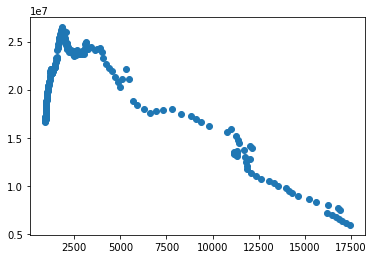

In [94]:
# generate related variables
# prepare data
data1 = gdp_childdeaths['income_per_person_gdppercapita_ppp_inflation_adjusted']
data2 = gdp_childdeaths['number_of_child_deaths']
# summarize
print('data1: mean=%.3f stdv=%.3f' % (np.mean(data1), np.std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (np.mean(data2), np.std(data2)))
# plot
plot.scatter(data1, data2)
plot.show()

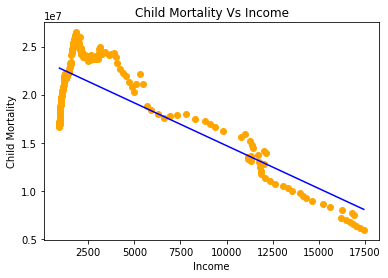

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     474.3
Date:                Sat, 26 Oct 2019   Prob (F-statistic):           3.38e-56
Time:                        13:37:28   Log-Likelihood:                -3518.1
No. Observations:                 216   AIC:                             7040.
Df Residuals:                     214   BIC:                             7047.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.36e+07   2.67e+05     88.419      0.000    2.31e+07    2.41e+07
x           -890.6690     40.897    -21.778      0.000    -971.282    -810.056
==============================================================================
Omnibus:                       20.573   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.304
Skew:                          -0.393   Prob(JB):                      0.00351
Kurtosis:                       2.201   Cond. No.                     8.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
linearRegressor = LinearRegression()
x = gdp_childdeaths.iloc[:, 1].values.reshape(-1, 1)
y = gdp_childdeaths.iloc[:, 2].values
linearRegressor.fit(x, y)
yPrediction=linearRegressor.predict(x)

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('y~x',data=gdp_childdeaths).fit()

# Visualising the training set results
plot.scatter(x, y, color = 'orange')
plot.plot(x, yPrediction, color = 'blue')
plot.title('Child Mortality Vs Income')
plot.xlabel('Income')
plot.ylabel('Child Mortality')
plot.show()

# Inspect the results
results.summary()

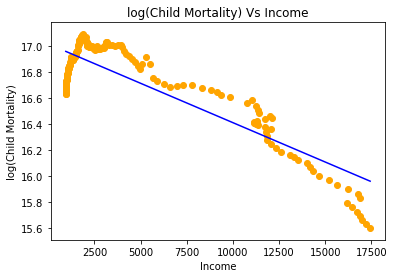

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     670.9
Date:                Sat, 26 Oct 2019   Prob (F-statistic):           6.79e-68
Time:                        13:37:28   Log-Likelihood:                 84.000
No. Observations:                 216   AIC:                            -164.0
Df Residuals:                     214   BIC:                            -157.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0159      0.015   1113.853      0.000      16.986      17.046
x          -6.062e-05   2.34e-06    -25.902      0.000   -6.52e-05    -5.6e-05
==============================================================================
Omnibus:                       38.707   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.641
Skew:                          -0.544   Prob(JB):                     8.96e-05
Kurtosis:                       2.058   Cond. No.                     8.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
linearRegressor = LinearRegression()
x = gdp_childdeaths.iloc[:, 1].values.reshape(-1, 1)
y = gdp_childdeaths.iloc[:, 2].values
y=np.log(y)

linearRegressor.fit(x, y)
yPrediction=linearRegressor.predict(x)

# Visualising the training set results
plot.scatter(x, y, color = 'orange')
plot.plot(x, yPrediction, color = 'blue')
plot.title('log(Child Mortality) Vs Income')
plot.xlabel('Income')
plot.ylabel('log(Child Mortality)')
plot.show()

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('y~x',data=gdp_childdeaths).fit()

# Inspect the results
results.summary()

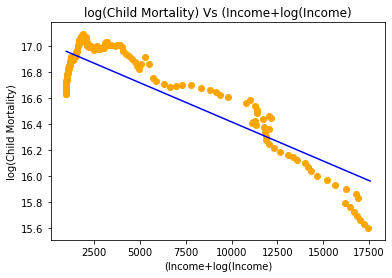

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     1795.
Date:                Sat, 26 Oct 2019   Prob (F-statistic):          4.89e-134
Time:                        13:37:28   Log-Likelihood:                 241.98
No. Observations:                 216   AIC:                            -478.0
Df Residuals:                     213   BIC:                            -467.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.0881      0.036    451.017      0.000      16.018      16.158
x             -0.0003   7.64e-06    -34.228      0.000      -0.000      -0.000
np.sqrt(x)     0.0310      0.001     26.584      0.000       0.029       0.033
==============================================================================
Omnibus:                        3.742   Durbin-Watson:                   0.080
Prob(Omnibus):                  0.154   Jarque-Bera (JB):                3.817
Skew:                          -0.307   Prob(JB):                        0.148
Kurtosis:                       2.784   Cond. No.                     4.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
linearRegressor = LinearRegression()
x = gdp_childdeaths.iloc[:, 1].values.reshape(-1, 1)
y = gdp_childdeaths.iloc[:, 2].values
y=np.log(y)

linearRegressor.fit(x+np.sqrt(x), y)
yPrediction=linearRegressor.predict(x+np.sqrt(x))

# Visualising the training set results
plot.scatter(x, y, color = 'orange')
plot.plot(x+np.sqrt(x), yPrediction, color = 'blue')
plot.title('log(Child Mortality) Vs (Income+log(Income)')
plot.xlabel('(Income+log(Income)')
plot.ylabel('log(Child Mortality)')
plot.show()

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('y~x+np.sqrt(x)',data=gdp_childdeaths).fit()

# Inspect the results
results.summary()